<a href="https://colab.research.google.com/github/joseruga/Estadistica_y_Probabilidad_para-CD-/blob/main/Semana4/2%20Teorema_del_limite_central.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Importar liberías y archivos

In [1]:
import numpy as np
import pandas as pd

import random
import operator
import re # módulo operaciones expresiones regulares
import unicodedata  #para quitar tildes
from collections import Counter
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns

## Definición de funciones

In [2]:
def errores_alturas(n, m = 500):
    '''
    n = tamaño de cada muestra
    m = cuántas muestras
       
    '''
    mu, sigma = 1675, 62.8     # dimensiones en milimetros

    muestras = {'muestra '+ str(i): np.random.normal(mu, sigma,n) for i in range(1, m+1)}
    alturas_hombres = pd.DataFrame.from_dict(muestras)
    sns.distplot(mu - alturas_hombres.mean(), fit=norm, kde=False, bins=50)
    plt.show()



In [3]:
def leer_libro(archivo_txt):
  '''funcion para leer un archivo en formato txt'''
  with open(archivo_txt, "r", encoding="utf8") as f:
    texto = f.read()
    texto = texto.replace("\n", "").replace("\r", "") 
  return texto

In [4]:
def borrar_elementos(texto, lista):
  '''Función para eliminar en un texto los elementos contenidos en una lista, 
  por ejemplo:   autor, titulo y otros elementos'''
  
  for elemento in lista:
    texto = texto.replace(elemento, "")
  return texto

In [5]:

def limpiar_texto(texto):
  '''Función para convertir a minúsculas, quitar signos de puntuación,
  números y tildes'''

  #Convertir en mínusculas 
  texto_limpio = texto.lower()

  #Quitar puntuación
  puntuacion = [".", "," , "-", "\n", ":", ";",'"', "'", "  ",
                "!", "¡", "¿", "?", "(", ")", "<", "«", "»", "~",]
  for p in puntuacion:
    texto_limpio = texto_limpio.replace(p,"")

  #Quitar numeros

  texto_limpio = "".join(filter(lambda x: not x.isdigit(), texto_limpio))

  #Quitar tildes 
  
  texto_limpio =''.join((c for c in unicodedata.normalize('NFD',texto_limpio) if
                         unicodedata.category(c) != 'Mn'))

  return texto_limpio

In [6]:

def genera_texto_nletras(texto, n=1, tot_letras = 100):
  '''Devuelve un texto, utilizando ngramas a partir de letras
  n es la cantidad de letras que se toman en consideración para 
  generar la siguiente'''
  ngramas = {}
  for i in range(len(texto) - n):
    seq = texto[i:i+n]
    if seq not in ngramas.keys():
      ngramas[seq] = []
    ngramas[seq].append(texto[i+n]) 
    
  ngrama = np.random.choice(list(ngramas.keys()))
  nuevo_texto = ngrama
  
  for i in range(tot_letras):
    if ngrama not in ngramas.keys():
      break
    siguiente_letra = np.random.choice(ngramas[ngrama])
    nuevo_texto += siguiente_letra
    ngrama = nuevo_texto[len(nuevo_texto)-n:len(nuevo_texto)]
  return nuevo_texto

In [7]:
def genera_muestras_de_texto(texto, grado=0, 
                             num_muestras=100, 
                             tam_muestra=200 ):
  muestras={}
  for i in range(num_muestras):
    if grado == 0:
      muestras[i]= "".join(random.sample(texto, tam_muestra))
    else:
      muestras[i] = genera_texto_nletras(texto, grado, tam_muestra)
  return pd.Series(muestras, name= 'muestra' )

In [8]:
def cuenta_vocales(texto):
  vocales ='aeiou'
  tot_vocales= 0
  for caracter in texto:
    if caracter in vocales:
      tot_vocales += 1
  return tot_vocales

In [9]:
def cuenta_caracteres_antes_de_n(texto):
  caracteres_antes = 0
  for caracter in texto:
    if caracter == 'n':
      break
    caracteres_antes += 1

  return caracteres_antes

# Distribución gaussiana

## Obtener muestras

a partir de la [distribución de la altura de trabajadores industriales de sexo masculino en Guadalajara](https://www.researchgate.net/publication/31722433_Dimensiones_antropometricas_de_la_poblacion_latinoamericana_Mexico_Cuba_Colombia_Chile_R_Avila_Chaurand_LR_Prado_Leon_EL_Gonzalez_Munoz)

In [10]:
mu, sigma = 1675, 62.8     # dimensiones en milimetros

n = 100 # tamaño de la muestra
m = 1000 # número de muestras
muestras = {'muestra '+str(i): np.random.normal(mu, sigma,n) for i in range(1, m+1)}
alturas_hombres = pd.DataFrame.from_dict(muestras)
alturas_hombres

,muestra 1,muestra 2,muestra 3,muestra 4,muestra 5,muestra 6,muestra 7,muestra 8,muestra 9,muestra 10,...,muestra 991,muestra 992,muestra 993,muestra 994,muestra 995,muestra 996,muestra 997,muestra 998,muestra 999,muestra 1000
0,1607.106012,1588.837189,1681.315582,1774.128213,1612.043336,1585.898727,1692.432203,1569.473959,1643.208763,1654.182596,...,1717.232581,1739.232707,1664.500940,1637.350251,1718.851363,1703.198173,1811.951448,1643.135712,1731.162972,1697.545950
1,1675.770846,1624.512259,1633.676938,1641.674230,1755.544289,1718.461528,1696.532331,1769.623167,1762.668750,1692.540483,...,1620.025328,1684.374801,1778.701170,1659.855546,1653.607090,1720.654042,1721.251977,1669.057922,1612.958652,1800.413819
2,1702.938876,1655.865651,1610.388118,1566.613386,1668.076433,1625.097723,1663.138447,1606.004577,1676.047103,1594.969916,...,1602.890846,1661.504840,1562.426079,1731.718179,1727.880090,1674.553869,1714.498997,1779.317336,1656.212586,1715.611294
3,1685.657746,1694.890431,1752.576354,1639.375013,1767.459293,1536.138066,1656.900097,1750.995144,1675.026269,1543.983923,...,1730.379670,1704.065292,1695.770539,1723.479480,1683.829639,1616.334650,1745.417235,1693.884811,1630.928762,1605.644299
4,1674.917202,1631.485543,1727.186022,1747.580070,1700.239927,1569.639323,1518.142054,1675.228043,1550.922107,1777.408992,...,1627.262418,1642.440426,1706.196051,1669.936910,1717.765852,1729.800736,1540.140408,1672.203040,1617.967088,1609.501777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1648.580229,1757.118913,1714.824954,1674.026057,1666.160326,1784.742115,1739.212127,1769.557577,1658.663992,1566.701323,...,1625.757601,1657.018161,1737.839539,1667.194128,1727.181716,1528.583028,1608.634630,1827.004577,1707.144198,1692.276011
96,1737.230344,1742.404584,1638.110855,1572.814139,1617.092711,1657.909355,1640.957829,1681.771186,1597.508390,1653.901958,...,1592.130403,1688.152266,1716.568797,1671.353589,1736.996739,1676.038664,1610.381707,1737.456540,1672.797875,1707.856509
97,1768.927774,1746.684077,1718.826930,1732.925424,1678.718891,1710.446437,1729.784497,1702.950600,1707.361772,1653.359983,...,1586.545361,1699.046898,1747.085700,1723.127860,1671.315771,1651.779687,1655.926738,1748.666625,1673.316409,1707.676687
98,1688.937656,1649.957918,1702.804966,1768.516816,1736.865094,1673.107718,1562.116561,1696.394260,1686.202628,1608.672374,...,1699.751670,1833.291439,1737.150422,1776.692176,1594.810589,1666.556705,1618.611068,1680.826304,1619.983557,1710.340709


<h2> Distribución de cada muestra

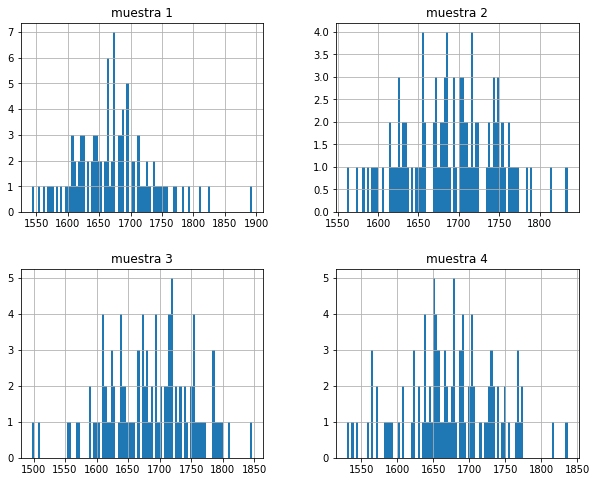

In [11]:
alturas_hombres.iloc[:,0:4].hist(figsize = (10,8), bins=100)
plt.show()

## Distribución de los promedios

In [12]:
medias = alturas_hombres.mean()
medias

muestra 1       1672.725242
muestra 2       1689.915372
muestra 3       1683.930295
muestra 4       1672.343276
muestra 5       1666.909919
                   ...     
muestra 996     1667.124953
muestra 997     1685.203824
muestra 998     1684.328906
muestra 999     1673.122645
muestra 1000    1687.296354
Length: 1000, dtype: float64

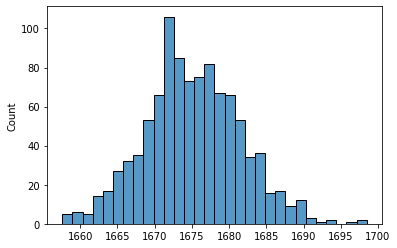

In [14]:
sns.histplot(medias,  bins=30)
plt.show()

## Distribución de los errores

In [15]:
errores = mu - medias
errores

muestra 1        2.274758
muestra 2      -14.915372
muestra 3       -8.930295
muestra 4        2.656724
muestra 5        8.090081
                  ...    
muestra 996      7.875047
muestra 997    -10.203824
muestra 998     -9.328906
muestra 999      1.877355
muestra 1000   -12.296354
Length: 1000, dtype: float64

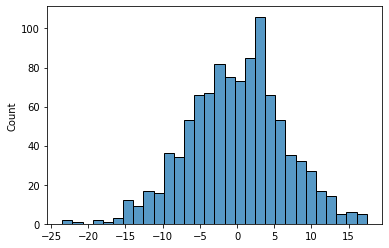

In [16]:
sns.histplot(errores,  bins=30)
plt.show()

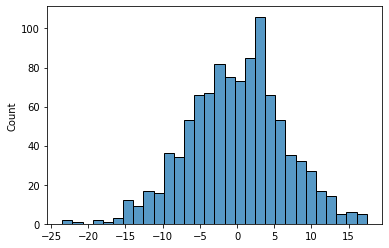

In [17]:
sns.histplot(errores,  bins=30)
plt.show()

# Distribución Bernoulli

#### Preprocesar libro y obtener probabilidades de los caracteres 

In [18]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [24]:
#Leer libro
libro = leer_libro('/content/gabriel_garcia_marquez_cien_annos_soledad.txt')
borrar = ['Gabriel García Márquez', 
          'Cien años de soledad',
          'EDITADO POR "EDICIONES LA CUEVA"',
          'Para J omi García Ascot y María Luisa Elio']

libro =  borrar_elementos(libro, borrar) 
libro_limpio = limpiar_texto(libro)

In [19]:
#Cargar csv con distribución de probabilidad de letras
Ley_P_letras = pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/ElementosEstadisticaMachineLearningPython/master/Semana4/Ley_Probabilidad_caracteres_100a%C3%B1os.csv')

# Calcular la probabilidad de obtener una vocal

filtro_vocal = Ley_P_letras['caracter'].isin(list('aeiou'))
p = Ley_P_letras.loc[filtro_vocal, 'probabilidad'].sum()
p

0.38405272562528125

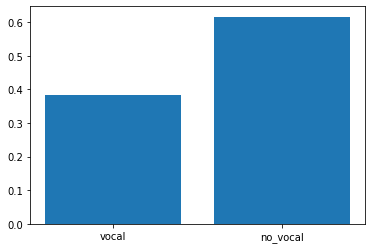

In [20]:
# Distribución bernoulli

plt.bar(['vocal','no_vocal'],[p, 1-p])
plt.show()

### Obtener muestras

In [25]:
%%time
n = 200 # tamaño de la muestra
m = 100000 # número de muestras

muestras=pd.DataFrame()
muestras['texto'] = (genera_muestras_de_texto(libro_limpio, grado = 0,
                                              num_muestras = m, tam_muestra=n))
indice=pd.Series(['muestra_'+str(i) for i in range (1, m+1)])
muestras.index=indice
muestras['vocales'] = muestras['texto'].apply(cuenta_vocales)
muestras['p_estimada'] = muestras['vocales']/n
muestras['errores']= p - muestras['vocales']/n

CPU times: user 17.3 s, sys: 61.8 ms, total: 17.3 s
Wall time: 17.4 s


In [26]:
muestras.head()

,texto,vocales,p_estimada,errores
muestra_1,aa ndrutpioeatieoaraluta s ralr hpeir feovins...,73,0.365,0.019053
muestra_2,auuoneicsraeavusausoalclu aalaisoansueadoapnn...,84,0.420,-0.035947
muestra_3,nbono odh uolr eo oluaedc acap teelboi ereid...,82,0.410,-0.025947
muestra_4,s iieda n ueae lpredsdusoaal oolauutdtir em ...,69,0.345,0.039053
muestra_5,le nillcrmtermnvp en rpcsraqnrluia ine ao co...,75,0.375,0.009053


In [28]:
muestras.describe()

,vocales,p_estimada,errores
count,100000.000000,100000.000000,100000.000000
mean,76.818060,0.384090,-0.000038
std,6.864971,0.034325,0.034325
min,44.000000,0.220000,-0.150947
25%,72.000000,0.360000,-0.020947
50%,77.000000,0.385000,-0.000947
75%,81.000000,0.405000,0.024053
max,107.000000,0.535000,0.164053


### Distribución de los promedios

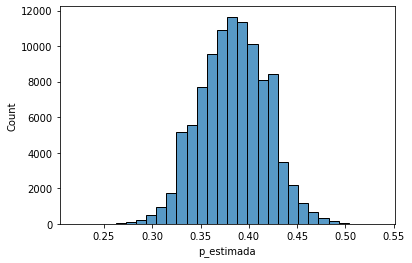

In [27]:
sns.histplot(muestras['p_estimada'],  bins=30)
plt.show()

## Distribución de los errores

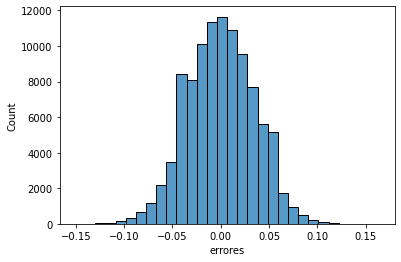

In [29]:
sns.histplot(muestras['errores'],  bins=30)
plt.show()

# Distribución exponencial

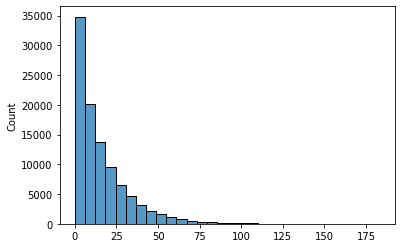

In [30]:
X = muestras['texto'].apply(cuenta_caracteres_antes_de_n).values
sns.histplot(X,  bins=30)
plt.show()

In [31]:
X.mean()

15.79775

**Ejemplos de fenómenos con distribución exponencial:**
- Valores máximos de precipitación diaria
- Compras efectuadas por visitantes en página web
- Tiempo para que se produzca un fallo


¿Qué otros??

### Obtener muestras

In [32]:
n = 200 # tamaño de la muestra
m = 2000 # número de muestras
m_exp = {'muestra '+str(i):np.random.choice(X, n) for i in range(1, m+1)}

muestras_exp = pd.DataFrame.from_dict(m_exp)
muestras_exp

,muestra 1,muestra 2,muestra 3,muestra 4,muestra 5,muestra 6,muestra 7,muestra 8,muestra 9,muestra 10,...,muestra 1991,muestra 1992,muestra 1993,muestra 1994,muestra 1995,muestra 1996,muestra 1997,muestra 1998,muestra 1999,muestra 2000
0,17,43,14,26,8,15,11,2,2,2,...,13,25,7,33,19,50,7,33,3,4
1,12,30,16,1,18,26,38,44,17,4,...,16,5,12,3,4,13,3,5,13,2
2,5,3,56,69,2,30,30,5,1,56,...,15,10,4,22,42,17,5,19,84,2
3,14,18,17,2,21,3,20,19,0,46,...,12,6,27,1,18,24,1,30,3,18
4,5,14,0,13,12,5,7,14,5,3,...,11,3,10,23,24,19,95,6,36,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,39,17,14,1,33,1,9,1,43,7,...,38,11,1,1,12,6,40,126,0,14
196,71,35,12,25,13,17,34,9,3,36,...,16,11,13,28,9,8,14,9,2,20
197,14,4,14,0,25,3,13,23,4,11,...,42,1,0,72,3,15,31,51,5,3
198,9,10,3,1,10,29,6,24,32,37,...,2,6,5,7,3,17,9,0,30,2


### Distribución de cada muestra

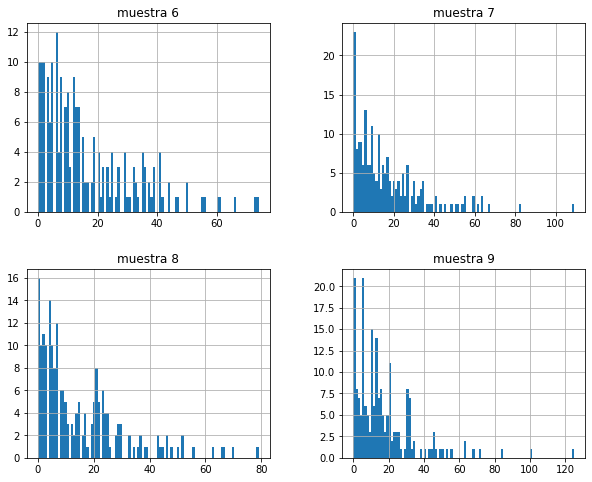

In [33]:
muestras_exp.iloc[:,5:9].hist(figsize = (10,8), bins=100)
plt.show()

### Distribución de los promedios

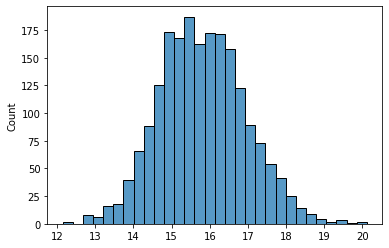

In [34]:
sns.histplot(muestras_exp.mean(),  bins=30)
plt.show()


## Distribución de los errores

In [35]:
X.mean()

15.79775

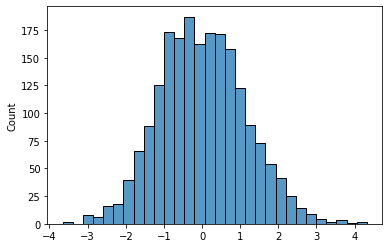

In [36]:
errores = muestras_exp.mean() - X.mean()
sns.histplot(errores,  bins=30)
plt.show()



https://seeing-theory.brown.edu/probability-distributions/index.html

